# 1. **Introduction**

Customer churn, also known as customer attrition or customer turnover, refers to the phenomenon where customers or subscribers cease their relationship with a company or service. In other words, it's the percentage of customers who stop using a product or service within a given time period.

Churn is a crucial metric for businesses, particularly in subscription-based models or industries with recurring revenue, such as telecommunications, internet services, software as a service (SaaS), and subscription boxes. Understanding and managing customer churn is essential for maintaining and growing a customer base, as acquiring new customers can be more expensive than retaining existing ones.

**Key points related to customer churn include:**

**Churn Rate:** The churn rate is a metric that quantifies the percentage of customers who have churned over a specific period. It is calculated by dividing the number of customers lost during that period by the total number of customers at the beginning of the period.

Churn Rate
=
(
Customers Lost/
Total Customers at Start
)
×
100


**Causes of Churn:** Customers may churn for various reasons, including dissatisfaction with the product or service, competitive offerings, changes in personal circumstances, or lack of engagement.

**Impact on Revenue:** Churn has a direct impact on a company's revenue, as losing customers means losing their associated revenue. It's important for businesses to mitigate churn to maintain and increase their revenue streams.

**Churn Prediction:** Many businesses use data analytics and machine learning to predict and identify customers at risk of churning. By analyzing customer behavior, engagement, and other relevant data, companies can take proactive measures to retain customers.

**Churn Management Strategies:** Companies implement various strategies to reduce churn, such as improving customer service, enhancing the product or service offering, offering loyalty programs, and providing targeted promotions.

Effective churn management involves a combination of customer engagement, satisfaction measurement, and strategic initiatives to address the root causes of churn and retain valuable customers.

Main Objective.
1. To understand the reasons behind the customers churning.

Specific objectives.
1. To predict the probability of new customers churning
2. To suggest ways of retaining customers and meeting their needs.

In [958]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [959]:
#Reading in the data
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the Data

In [960]:
#Shape of the data
df.shape

(7043, 21)

We have 7043 rows and 21 columns

In [961]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. No missing data
2. Combination of both numerical and non-numerical columns, with 3 numerical columns and 18 categorical columns

Text(0.5, 1.0, 'The distribution of the missing data')

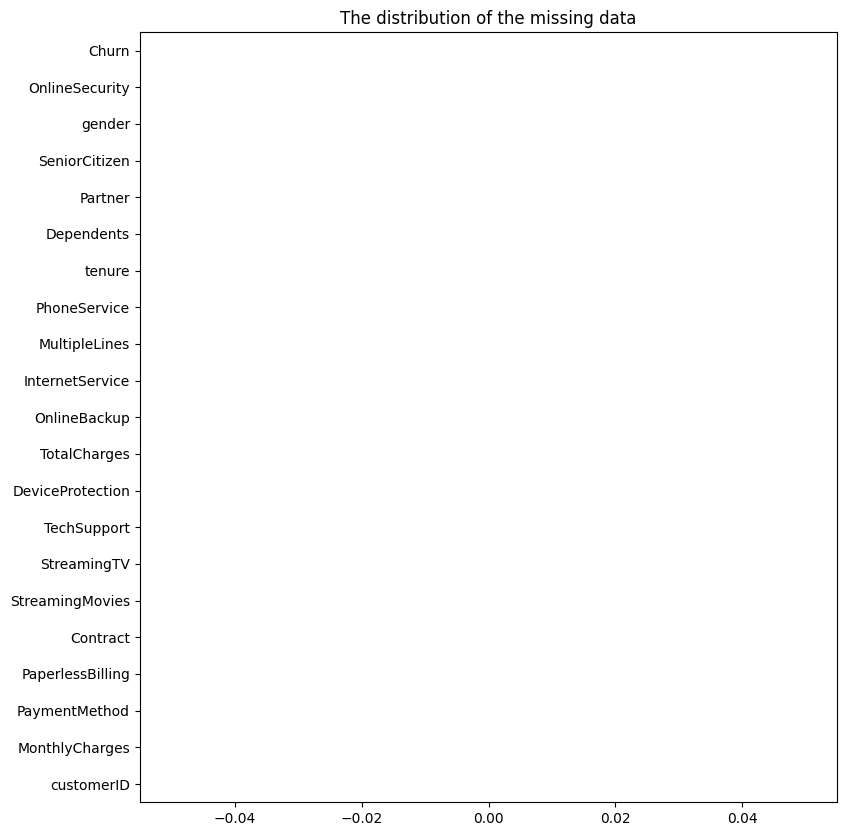

In [963]:
#Plotting a bar graph to see the distribution of the missing data
df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9,10))
plt.title("The distribution of the missing data")

In [964]:
#Changing the TotalCharges column from being categorical to numeric, it should be in numeric.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have some missing values in TotalCharges column.

In [966]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

since the number of missing values is low, it is wise to drop the rows with the missing data

In [967]:
# Display the rows with missing values and their count
print("Rows with Missing Values:")
print(df[df.isnull().any(axis=1)])
print("\nCounts:")
print(df.isnull().sum())

# Dropping rows with missing values in 'Total_charges'
df = df.dropna()

# Display the modified DataFrame
print("\nDataFrame After Dropping Rows:")
print(df)


Rows with Missing Values:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL 

In [968]:
df['TotalCharges'].isnull().sum()

0

In [969]:
print(df.nunique())

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


Categorical data are to be encoded

In [970]:
#Checking for duplicated values
df.duplicated().sum()

0

No duplicated values

In [971]:
#Summary of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [972]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [973]:
#The target column is the churn column, we therefore would like to map it to numerical values.
mapping = {
    'Yes': 1,
    'No' : 0
}
df['Churn'] = df['Churn'].replace(mapping)

# Preprocessing the Data

# Checking the distribution of the data

<Axes: >

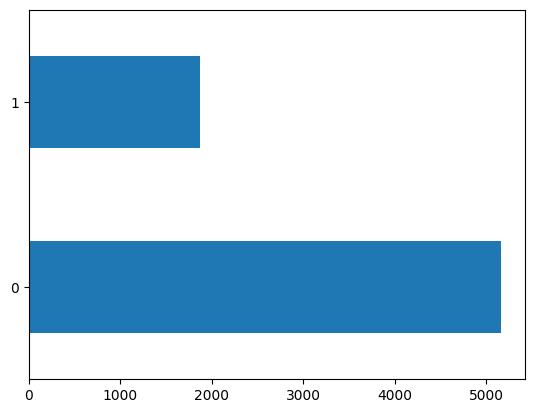

In [974]:
#Distribution of the target variable
df["Churn"].value_counts().plot(kind = 'barh')

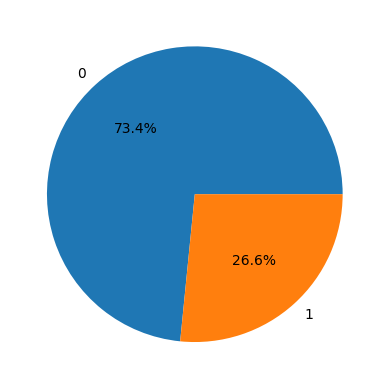

In [975]:
churn=df['Churn'].value_counts()
churn
piechart=plt.pie(x=churn,labels=churn.keys(),autopct="%.1f%%")

73.4% of customers churned while 26.6% did not. Extra analysis will be done on this. For now we can see that the data is highly imbalanced.

Checking for outliers

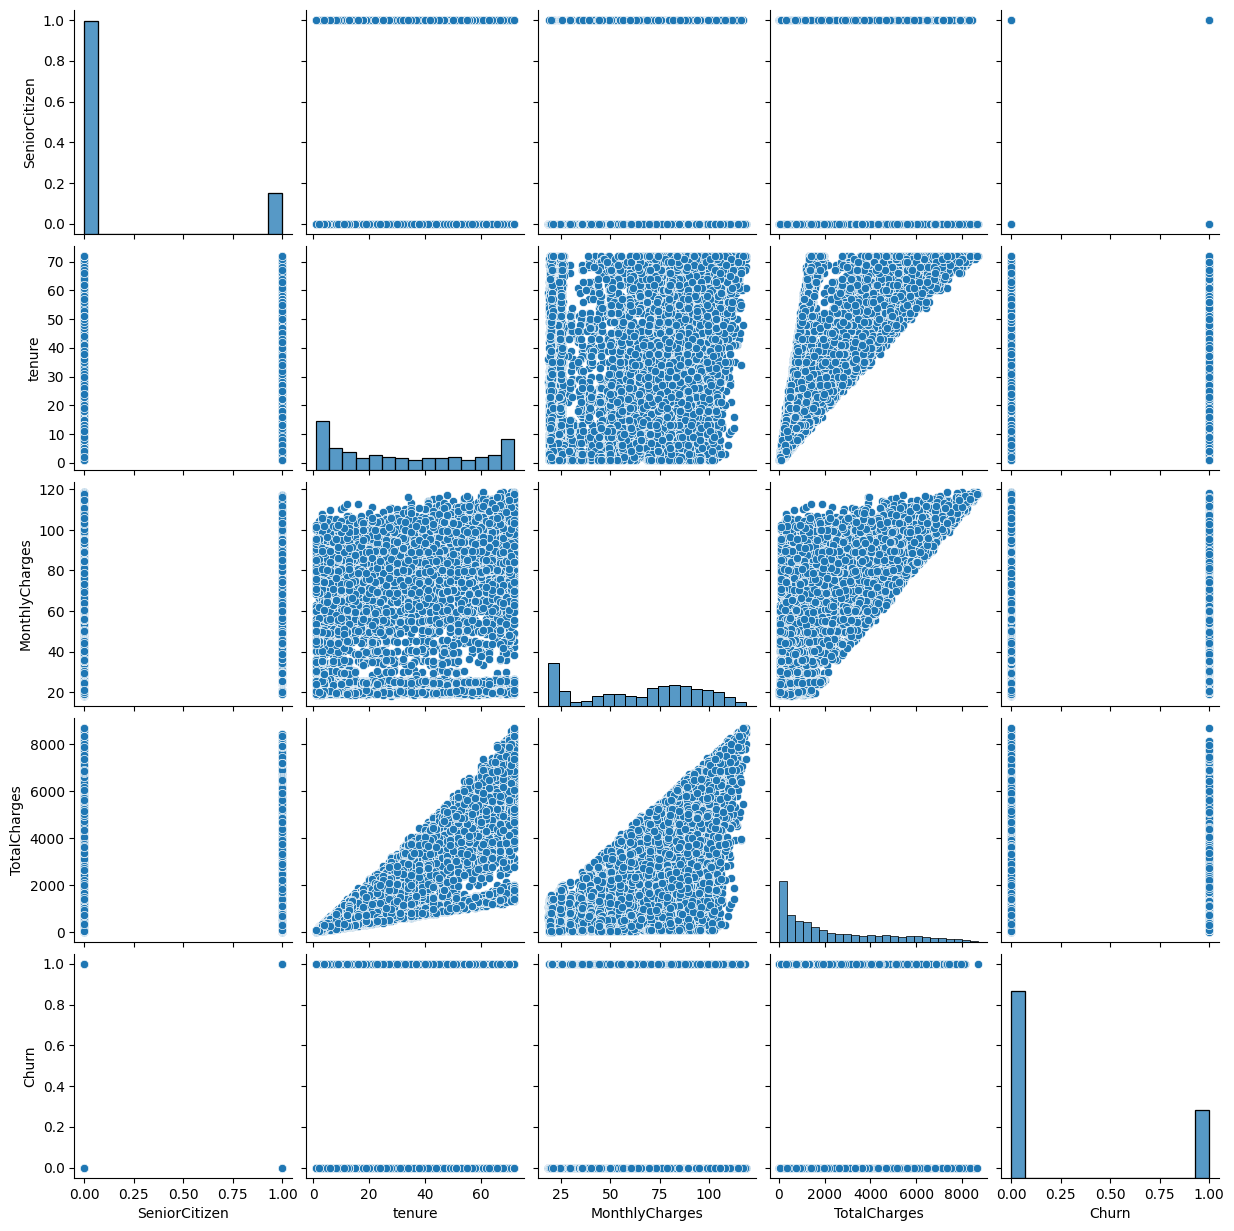

In [976]:
sns.pairplot(df)

In [977]:
from collections import Counter

In [978]:
#Removing the customerID column
data = df.iloc[:,1:]

In [979]:
numeric_columns = []
cat_columns = []

for col in data.columns:
  if data[col].nunique() < 10:
    cat_columns.append(col)
  else:
    numeric_columns.append(col)

numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

## 1. Making a comparison of the features against the target variable

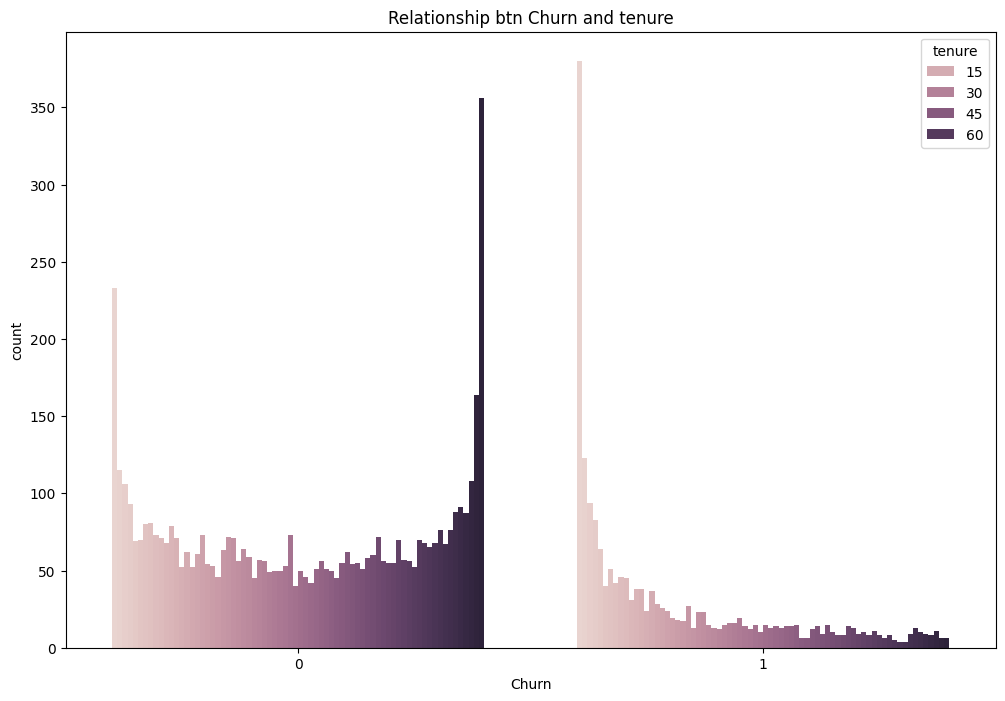

In [980]:
#

plt.figure(figsize=(12, 8))
sns.countplot(x='Churn', hue='tenure', data=df)
plt.title('Relationship btn Churn and tenure')
plt.show()


<ipython-input-981-0ff3ef16acb8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Relationship btn tenure and churn')

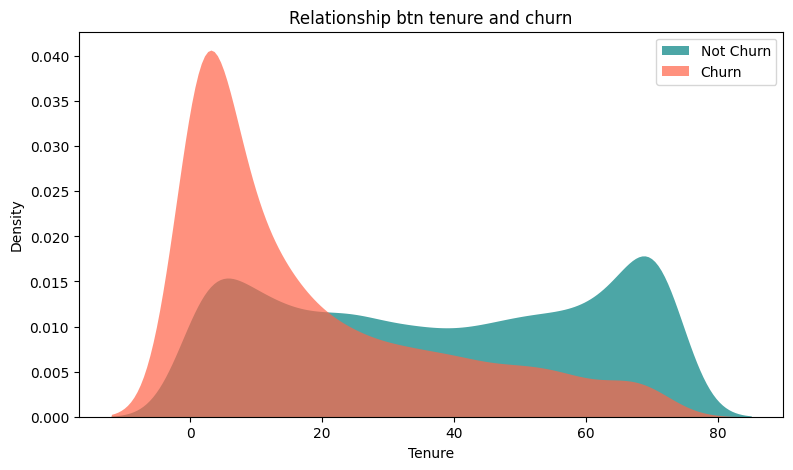

In [981]:
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Relationship btn tenure and churn')

From the two graphs above, it can be inferred that when a customer has been in the company for a short period of time, the chances of quitting are high but when they have been present for a long time, the chances of quitting are low.

<ipython-input-982-d651d7cd8fe8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Relationship btn TotalCharges and churn')

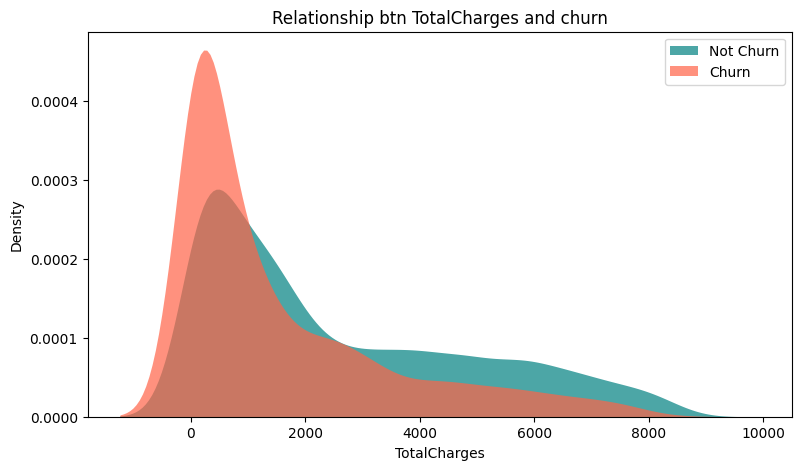

In [982]:
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Relationship btn TotalCharges and churn')

Interestingly, there are more customers churning when the total charges are low than when the total charges are high

In [983]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [984]:
df.groupby(['SeniorCitizen','Churn']).customerID.count()

SeniorCitizen  Churn
0              0        4497
               1        1393
1              0         666
               1         476
Name: customerID, dtype: int64

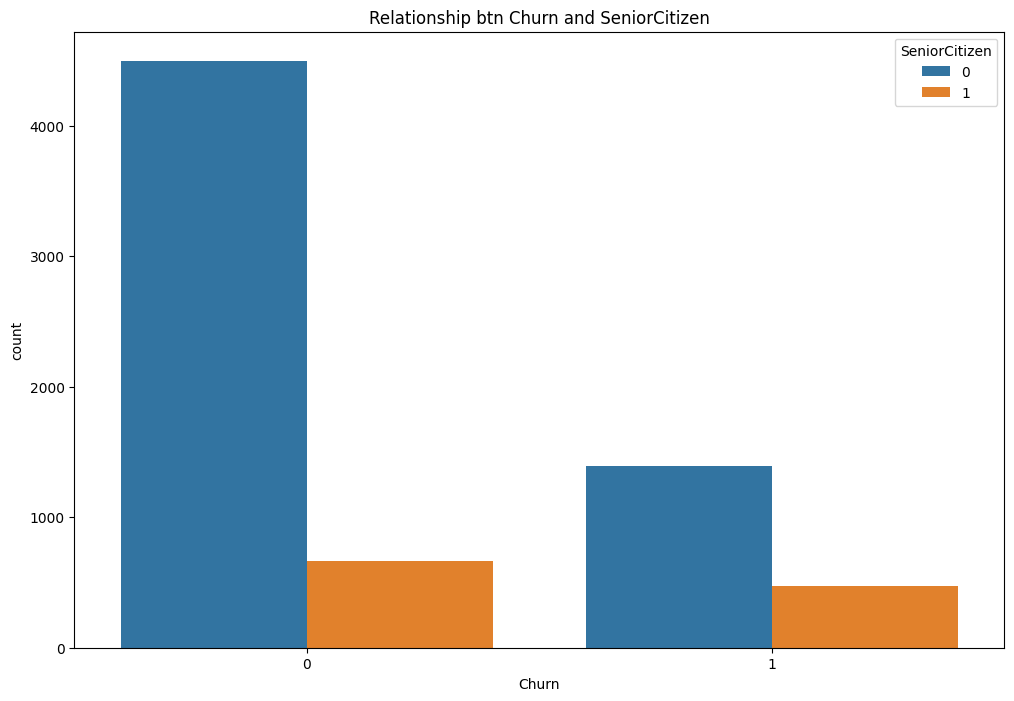

In [985]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title('Relationship btn Churn and SeniorCitizen')
plt.show()

Most customers that use the internet service are the young citizens. Also majority of those that quit are the young citizens. Around the same number of senior citizens that subscribe also quit.

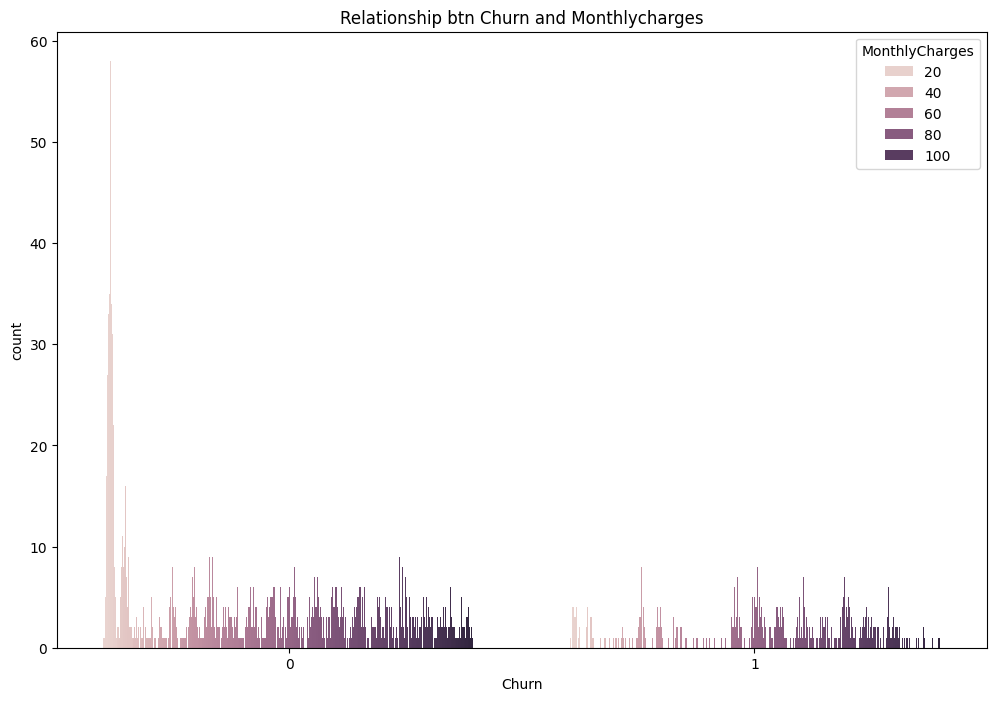

In [986]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn', hue='MonthlyCharges', data=df)
plt.title('Relationship btn Churn and Monthlycharges')
plt.show()

<ipython-input-987-ceaee891cd73>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Relationship btn MonthlyCharges and Churn')

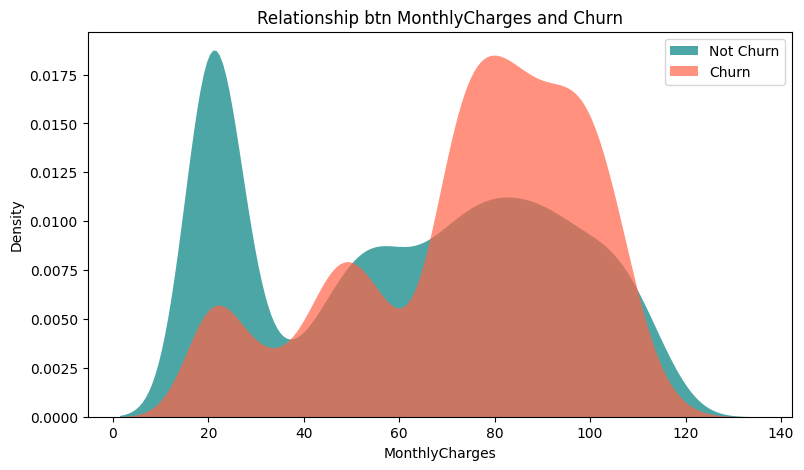

In [987]:
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('MonthlyCharges')
ax.set_title('Relationship btn MonthlyCharges and Churn')

Customers churn the most with monthly charges being at around 80. When the charges are low customers are retained.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

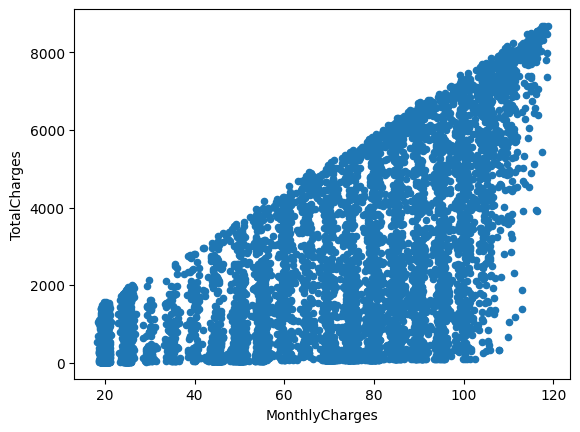

In [988]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                      y='TotalCharges')

Monthly Charges accumulate with increase in monthly charges

In [989]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [990]:
df.groupby(['gender','Churn']).customerID.count()

gender  Churn
Female  0        2544
        1         939
Male    0        2619
        1         930
Name: customerID, dtype: int64

In [991]:
import matplotlib.ticker as mtick # For specifying the axes tick format

Text(0.5, 0.98, 'Gender vs. Churn Variable categories')

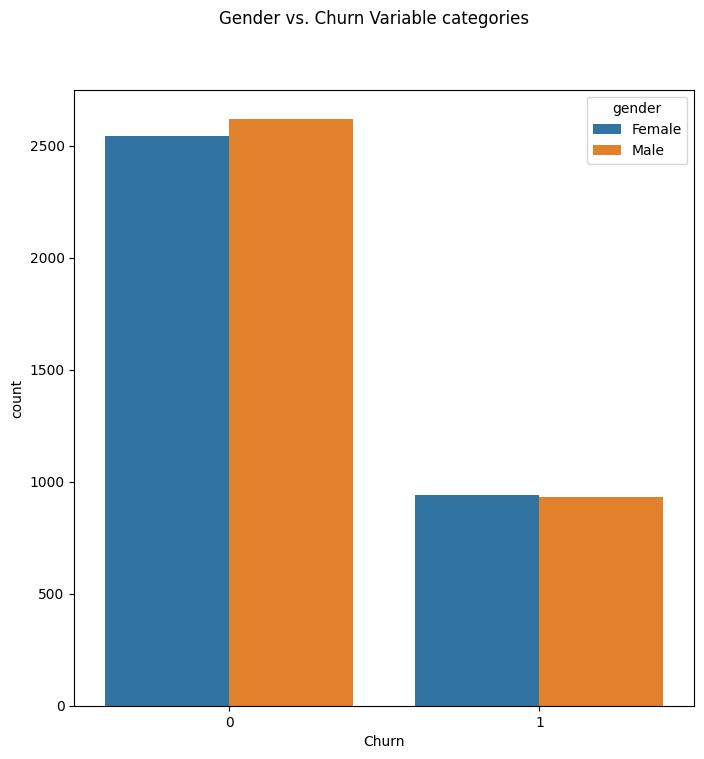

In [992]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="gender", data=df,ax=ax)
ax.legend(title="gender")
ax.set_xlabel("Churn")
fig.suptitle("Gender vs. Churn Variable categories")

Both genders maintain their service usage in equal numbers. Also churning is in equal proportion.

In [993]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [994]:
df.groupby(['Partner','Churn']).customerID.count()

Partner  Churn
No       0        2439
         1        1200
Yes      0        2724
         1         669
Name: customerID, dtype: int64

Text(0.5, 0.98, 'Partner vs. Churn Variable categories')

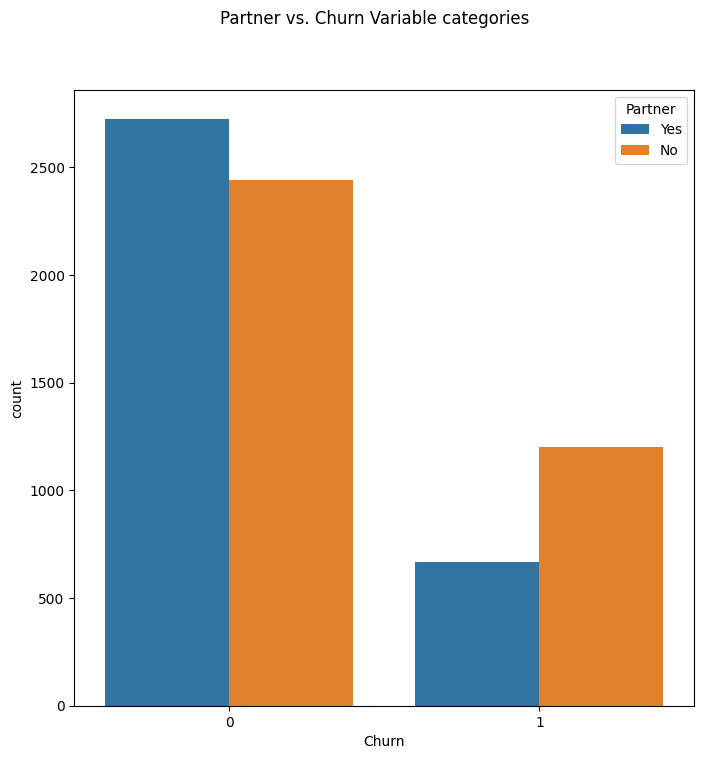

In [995]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Partner", data=df,ax=ax)
ax.legend(title="Partner")
ax.set_xlabel("Churn")
fig.suptitle("Partner vs. Churn Variable categories")

Most customers who churn with respect to having partners are those who do not have partners.

In [996]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [997]:
df.groupby(['Dependents','Churn']).customerID.count()

Dependents  Churn
No          0        3390
            1        1543
Yes         0        1773
            1         326
Name: customerID, dtype: int64

Text(0.5, 0.98, 'Dependents vs. Churn Variable categories')

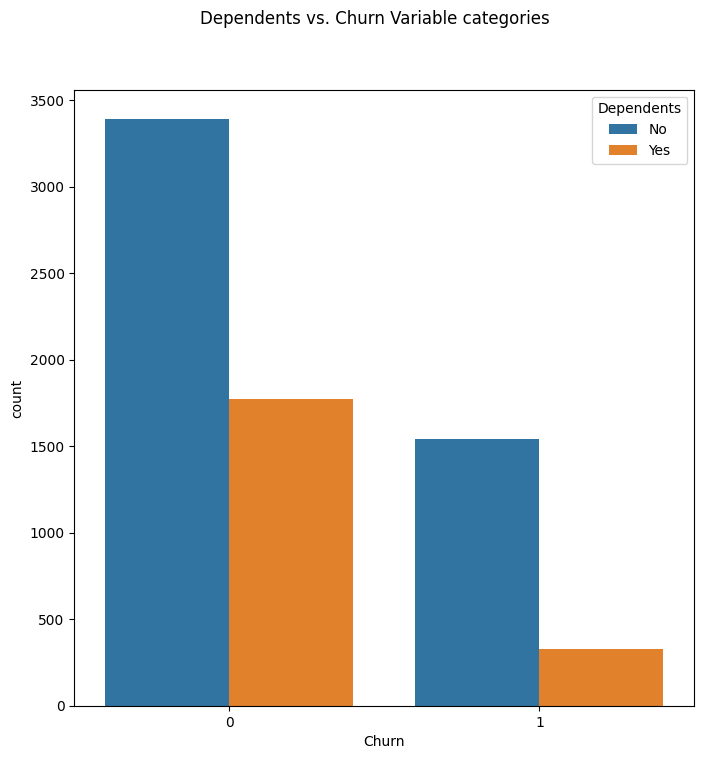

In [998]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Dependents", data=df,ax=ax)
ax.legend(title="Dependents")
ax.set_xlabel("Churn")
fig.suptitle("Dependents vs. Churn Variable categories")

Most people using the telco service do not have dependents. They are more than those with dependents. Also majority of those who churn are those without dependents. From the graph it can be concluded that the presence of dependents does not affect churning.

In [999]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [1000]:
df.groupby(['PhoneService','Churn']).customerID.count()

PhoneService  Churn
No            0         510
              1         170
Yes           0        4653
              1        1699
Name: customerID, dtype: int64

Text(0.5, 0.98, 'PhoneService vs. Churn Variable categories')

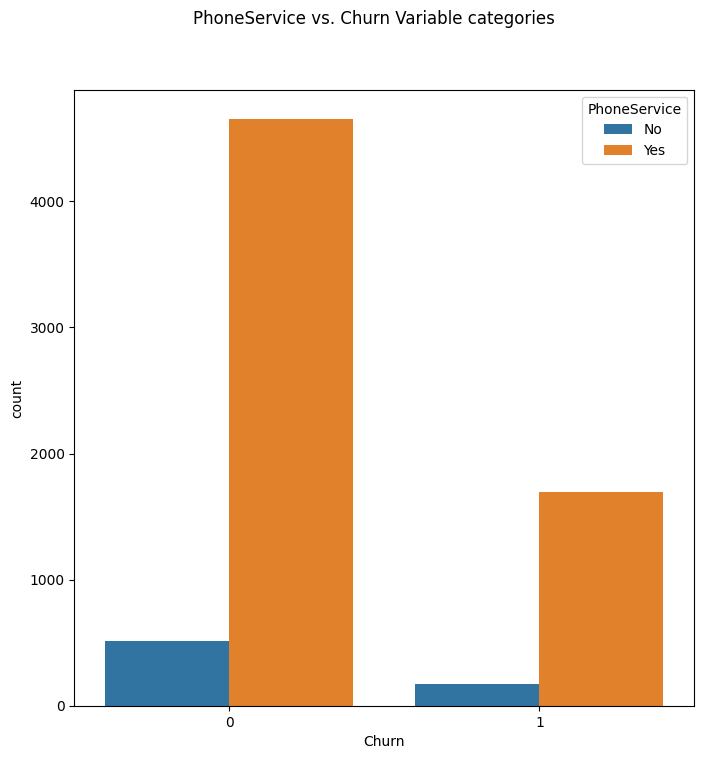

In [1001]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="PhoneService", data=df,ax=ax)
ax.legend(title="PhoneService")
ax.set_xlabel("Churn")
fig.suptitle("PhoneService vs. Churn Variable categories")

Most customers use phone services. They also churn out proportionally. The use of a phone service does not really affect churning

In [1002]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [1003]:
df.groupby(['MultipleLines','Churn']).customerID.count()

MultipleLines     Churn
No                0        2536
                  1         849
No phone service  0         510
                  1         170
Yes               0        2117
                  1         850
Name: customerID, dtype: int64

Text(0.5, 0.98, 'MultipleLines vs. Churn Variable categories')

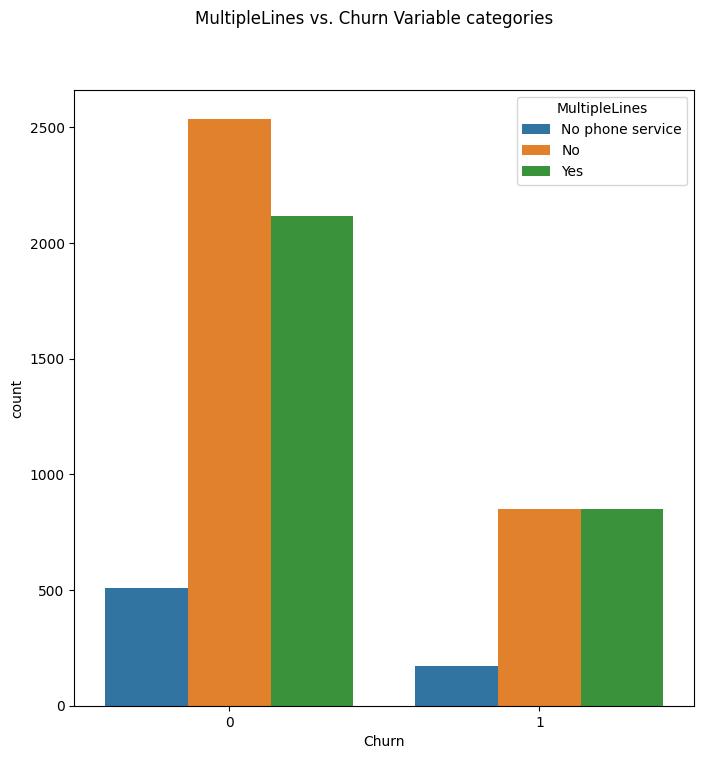

In [1004]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="MultipleLines", data=df,ax=ax)
ax.legend(title="MultipleLines")
ax.set_xlabel("Churn")
fig.suptitle("MultipleLines vs. Churn Variable categories")

Most customers do not have a phone service. Nevertheless, it does not affect their churning. On the contrary, the presence of a phone service affect churning in a way. It is to be noted that most customers do not use multiple lines

In [1005]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [1006]:
df.groupby(['InternetService','Churn']).customerID.count()

InternetService  Churn
DSL              0        1957
                 1         459
Fiber optic      0        1799
                 1        1297
No               0        1407
                 1         113
Name: customerID, dtype: int64

Text(0.5, 0.98, 'InternetService vs. Churn Variable categories')

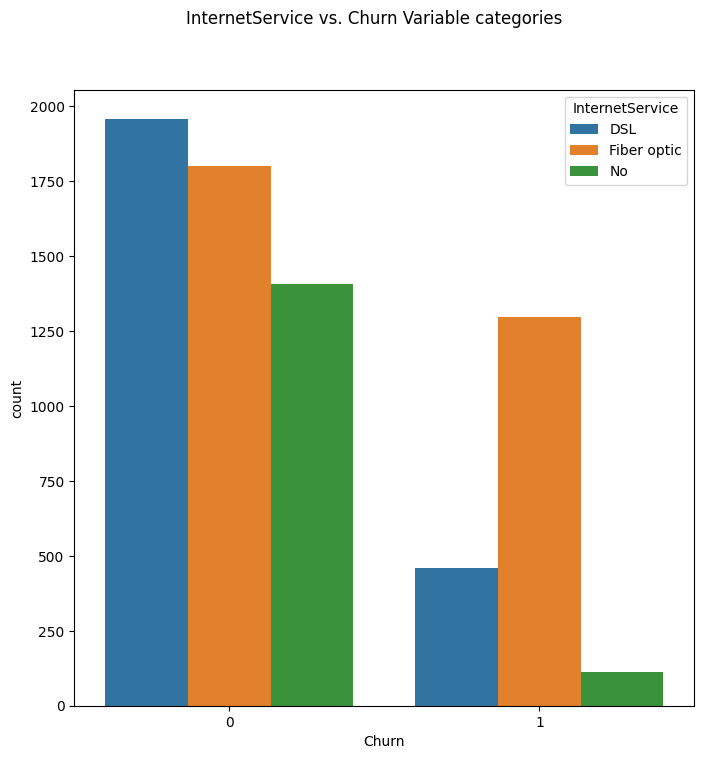

In [1007]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="InternetService", data=df,ax=ax)
ax.legend(title="InternetService")
ax.set_xlabel("Churn")
fig.suptitle("InternetService vs. Churn Variable categories")

Customers that use fiber optic churn the most.

In [1008]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [1009]:
df.groupby(['OnlineSecurity','Churn']).customerID.count()

OnlineSecurity       Churn
No                   0        2036
                     1        1461
No internet service  0        1407
                     1         113
Yes                  0        1720
                     1         295
Name: customerID, dtype: int64

Text(0.5, 0.98, 'OnlineSecurity vs. Churn Variable categories')

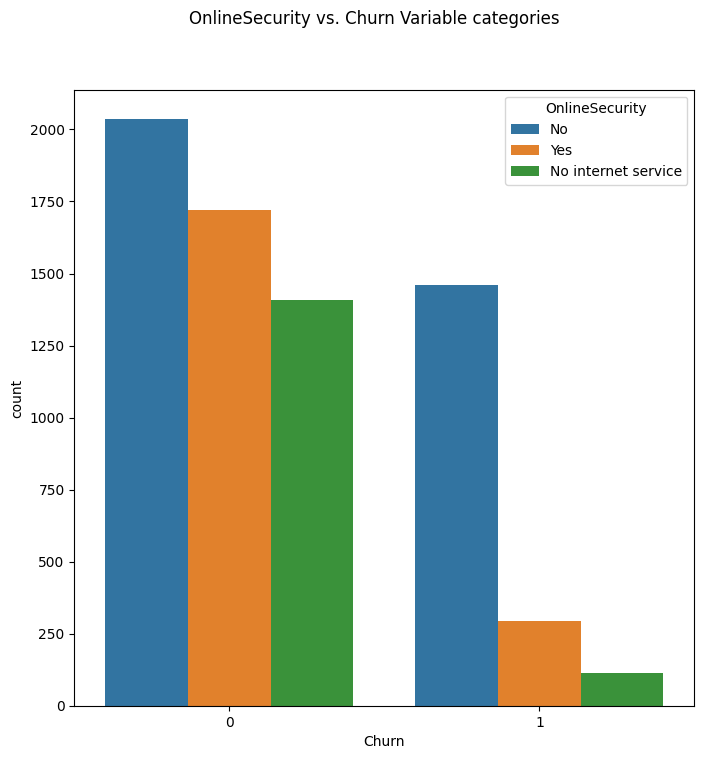

In [1010]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="OnlineSecurity", data=df,ax=ax)
ax.legend(title="OnlineSecurity")
ax.set_xlabel("Churn")
fig.suptitle("OnlineSecurity vs. Churn Variable categories")

Customers churn because of lack of online security

In [1011]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [1012]:
df.groupby(['OnlineBackup','Churn']).customerID.count()

OnlineBackup         Churn
No                   0        1854
                     1        1233
No internet service  0        1407
                     1         113
Yes                  0        1902
                     1         523
Name: customerID, dtype: int64

Text(0.5, 0.98, 'OnlineBackup vs. Churn Variable categories')

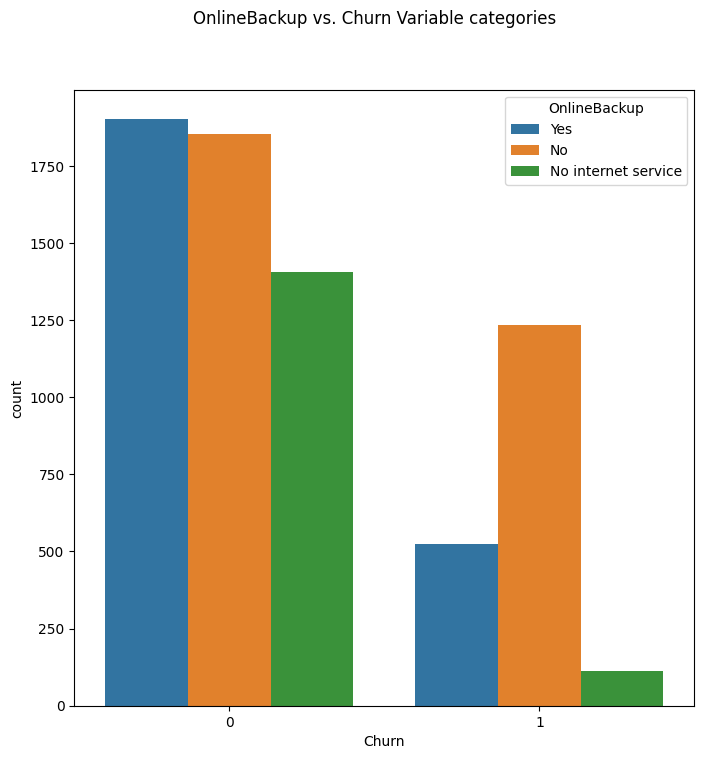

In [1013]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="OnlineBackup", data=df,ax=ax)
ax.legend(title="OnlineBackup")
ax.set_xlabel("Churn")
fig.suptitle("OnlineBackup vs. Churn Variable categories")

Lack of online backup discourages clients and lead them to quit.

In [1014]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [1015]:
df.groupby(['DeviceProtection','Churn']).customerID.count()

DeviceProtection     Churn
No                   0        1883
                     1        1211
No internet service  0        1407
                     1         113
Yes                  0        1873
                     1         545
Name: customerID, dtype: int64

Text(0.5, 0.98, 'DeviceProtection vs. Churn Variable categories')

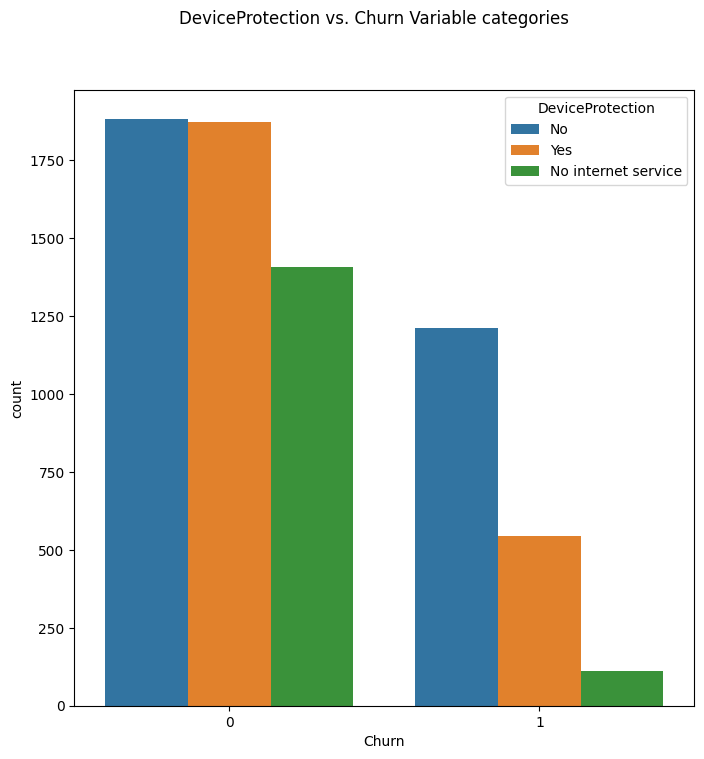

In [1016]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="DeviceProtection", data=df,ax=ax)
ax.legend(title="DeviceProtection")
ax.set_xlabel("Churn")
fig.suptitle("DeviceProtection vs. Churn Variable categories")

Customers are concerned with the protection of their devices and would prefer if such protection is there. If there is no protection customers abandon the services.

In [1017]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [1018]:
df.groupby(['TechSupport','Churn']).customerID.count()

TechSupport          Churn
No                   0        2026
                     1        1446
No internet service  0        1407
                     1         113
Yes                  0        1730
                     1         310
Name: customerID, dtype: int64

Text(0.5, 0.98, 'TechSupport vs. Churn Variable categories')

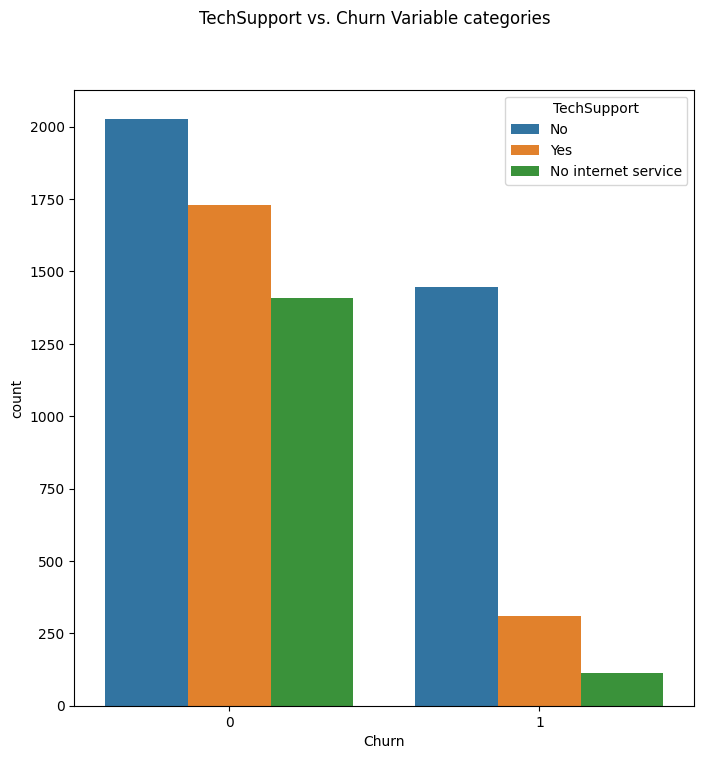

In [1019]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="TechSupport", data=df,ax=ax)
ax.legend(title="TechSupport")
ax.set_xlabel("Churn")
fig.suptitle("TechSupport vs. Churn Variable categories")

Clients with no tech support churn the most. They quit when they find no assistance on how to use the telecommunication services.

In [1020]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [1021]:
df.groupby(['StreamingTV','Churn']).customerID.count()

StreamingTV          Churn
No                   0        1867
                     1         942
No internet service  0        1407
                     1         113
Yes                  0        1889
                     1         814
Name: customerID, dtype: int64

Text(0.5, 0.98, 'StreamingTV vs. Churn Variable categories')

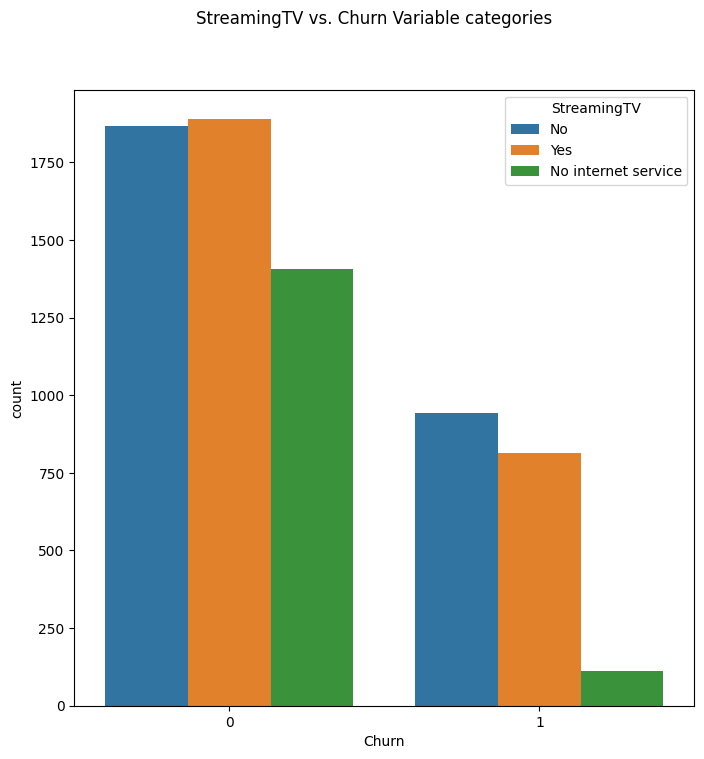

In [1022]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="StreamingTV", data=df,ax=ax)
ax.legend(title="StreamingTV")
ax.set_xlabel("Churn")
fig.suptitle("StreamingTV vs. Churn Variable categories")

Customers with no internet service with regards to streaming TV services churn the least.

In [1023]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [1024]:
df.groupby(['StreamingMovies','Churn']).customerID.count()

StreamingMovies      Churn
No                   0        1843
                     1         938
No internet service  0        1407
                     1         113
Yes                  0        1913
                     1         818
Name: customerID, dtype: int64

Text(0.5, 0.98, 'StreamingMovies vs. Churn Variable categories')

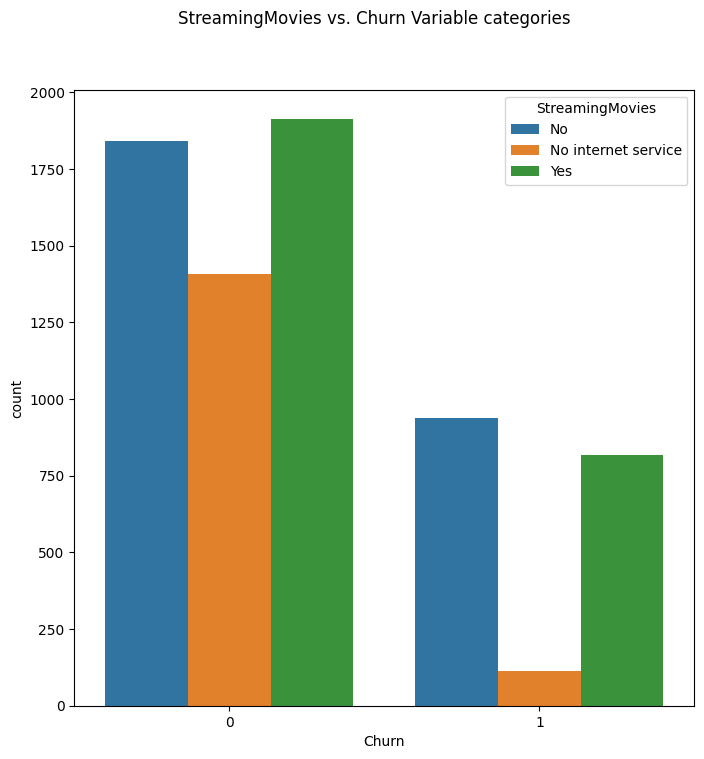

In [1025]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="StreamingMovies", data=df,ax=ax)
ax.legend(title="StreamingMovies")
ax.set_xlabel("Churn")
fig.suptitle("StreamingMovies vs. Churn Variable categories")

Of the customers who churn, majority of them have no streaming movie service. Those that have a streaming service churn at a slightly lower rate. Those with no internet service have a negligible churning rate.

In [1026]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [1027]:
df.groupby(['Contract','Churn']).customerID.count()

Contract        Churn
Month-to-month  0        2220
                1        1655
One year        0        1306
                1         166
Two year        0        1637
                1          48
Name: customerID, dtype: int64

Text(0.5, 0.98, 'Contract vs. Churn Variable categories')

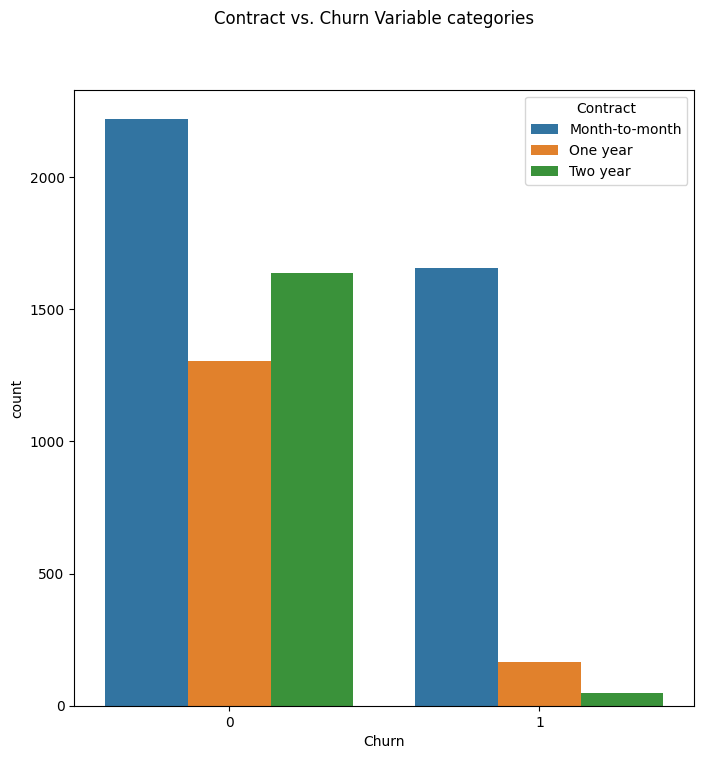

In [1028]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="Contract", data=df,ax=ax)
ax.legend(title="Contract")
ax.set_xlabel("Churn")
fig.suptitle("Contract vs. Churn Variable categories")

Those clients with short contracts of month to month are likely to churn. The other longer contracts experience lower churning rate.

In [1029]:
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [1030]:
df.groupby(['PaperlessBilling','Churn']).customerID.count()

PaperlessBilling  Churn
No                0        2395
                  1         469
Yes               0        2768
                  1        1400
Name: customerID, dtype: int64

Text(0.5, 0.98, 'PaperlessBilling vs. Churn Variable categories')

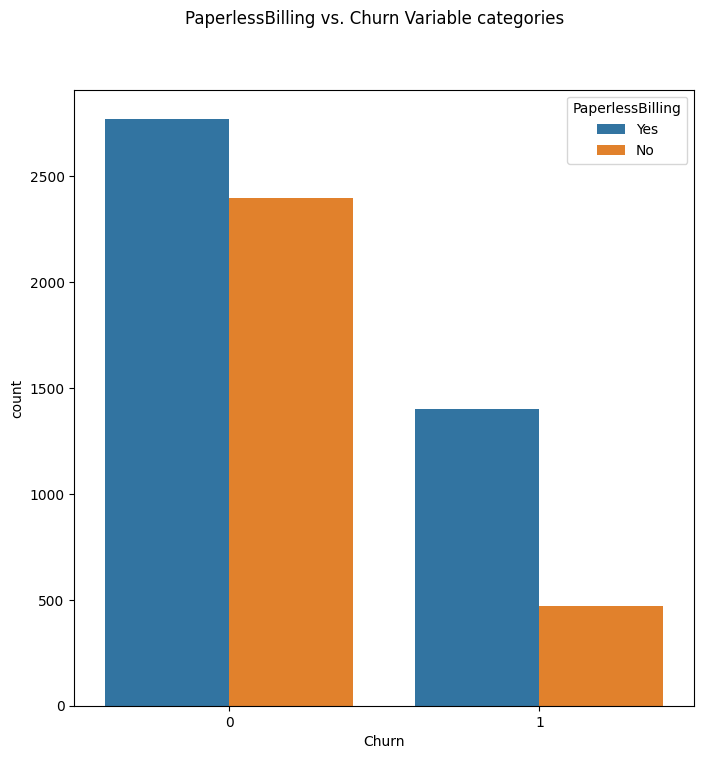

In [1031]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="PaperlessBilling", data=df,ax=ax)
ax.legend(title="PaperlessBilling")
ax.set_xlabel("Churn")
fig.suptitle("PaperlessBilling vs. Churn Variable categories")

Majority of customers use paperless billing. Paperless billing has a higher result of customers churning.

In [1032]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [1033]:
df.groupby(['PaymentMethod','Churn']).customerID.count()

PaymentMethod              Churn
Bank transfer (automatic)  0        1284
                           1         258
Credit card (automatic)    0        1289
                           1         232
Electronic check           0        1294
                           1        1071
Mailed check               0        1296
                           1         308
Name: customerID, dtype: int64

Text(0.5, 0.98, 'PaymentMethod vs. Churn Variable categories')

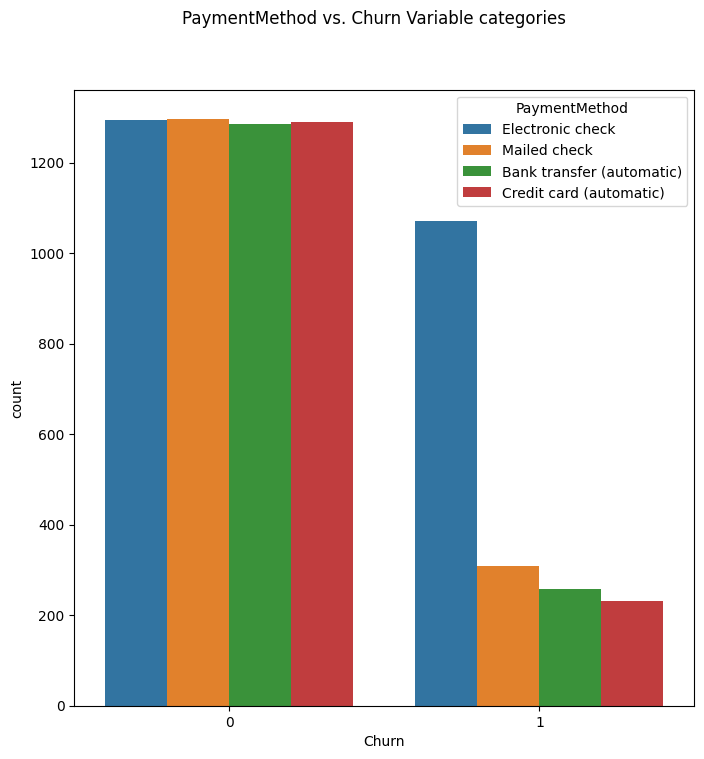

In [1034]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Churn", hue="PaymentMethod", data=df,ax=ax)
ax.legend(title="PaymentMethod")
ax.set_xlabel("Churn")
fig.suptitle("PaymentMethod vs. Churn Variable categories")

The payment method has some effect on customer churning. In comparison with the other methods of payment, electronic check results in more customers churning. The other methods have low rates of churning at almost the same measure with the use of automatic credit card being the lowest.

### Recommendations for the Company

1. When venturing into the Telco industry, it would be best for the company to keep its charges below 80, preferably at around 60, the price beyond which customers start churning. However , from a price charge of $100 up to 120, the rate of churn reduces. That means there is a special service at that price range that customers are willing to pay for. Therefore the company ought to segment the customers interested in that service.

2. It is important for the company to take care of new customers. This is because faced with many uncertainties and lack of adequate information, many of them quit. The company ought to provide incentives for the new customers and do a follow up upon subscription.  They should be in constant touch with them to be able to address the issues that they may have.

3. When the total charges are low, the customers show lack of commitment as they are not tied down by any payment. It is therefore imperative for the company to spell out the charges for the clients before their subscription. It may also be a way for the company to give the clients free trial days to gauge for themselves if they are going to like the service. It is at this point that the company needs to support them by attending to their questions and providing them with full information.

4. The senior citizens do not use the service in large numbers. This may be because there isn’t a service that is tailored specifically for them. The company has to conduct a survey to determine the reason for the senior citizens not subscribing. Also the young citizens love adventure and subscribe to the service in large numbers. Sadly, a number of them churn thereafter. The company then has to check the service that the young citizens subscribe to most and then tailor them to suit the needs of young people. If it is movies streaming there should be a variety of movies to stream and also the connectivity to the streaming service should be available.

5. Gender doesn’t affect the churning rate of the customers.

6. It is much important to consider the customers without partners as they are the ones that quit the most. It could be because of decision making. When making a unilateral decision, it is easier to make uninformed decisions if they do not consult anyone. the company has to provide promotional packages targeting the customers without partners.

7. The mobile service has to be improved to reduce the rate of churning for the customers who use it.

8. The company has to check its fiber internet service as most customers really quit. It may be because of the price, the bandwidth or speed or stability.

9. It is important to inform customers about the importance of online security upon service subscription. This is because very many customers do not have online security and the vast number of them quit. This is probably because of attacks on their products.

10. Advising customers of using online backup is also important during subscription. This applies to those who use internet service. This is because majority of those who do not use it quit the service along the way. This may be caused by loss of their information or storage issues.

11. For clients that use the internet service, the company must advice and install device protection for their customers as it is a major reason for clients churning.

12. The company ought to provide tech support for its customers in order for them to know how to use their subscribed services. With that, they can greatly minimize customer churning.

13. It can be seen that TV streaming service is important. However, it doesn’t stop there. Factors such as TV streaming quality, cost charged, number of channels need to be considered as also the customers who use the TV streaming service quit in large numbers.

14. The customers that do not use the company’s internet service churn the least with regards to movies streaming. The problem now can be traced to the ability of the internet to support movies streaming. The company could increase the bandwidth of movies streaming.

15. Commitment issues arise when the customers subscribe to short term contracts. Therefore many customers quit. The company has to look for ways to convincingly tie down customers to long term contracts by offering incentives.

16. Papered billing would make customers to stay as is clearly seen, then the company should adopt it, a lot of paperwork notwithstanding.

17. Since all the methods of payment are almost equal in terms of customer usage, it would be wise to drop the electronic payment method as it leads to customer churning. Those that had been using it can adopt credit card (automatic) method as it slightly has less customers churning.


The company has to advise the customers regarding importance of the following during subscription:
i. Online security
ii. Online backup
iii. Device protection

# Feature Engineering

### Encoding Categorical Features

I use one hot encoding to encode categorical features because all the categorical features are nominal, i.e, they are not ranked but fit into any category.

In [1035]:
#Remove customer IDs from the data set
New_df = df.iloc[:,1:]

In [1036]:
New_df = pd.get_dummies(New_df)
New_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [1037]:
New_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [1038]:
New_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


One hot encoding generates extra numerical columns ideal for modelling

<Axes: >

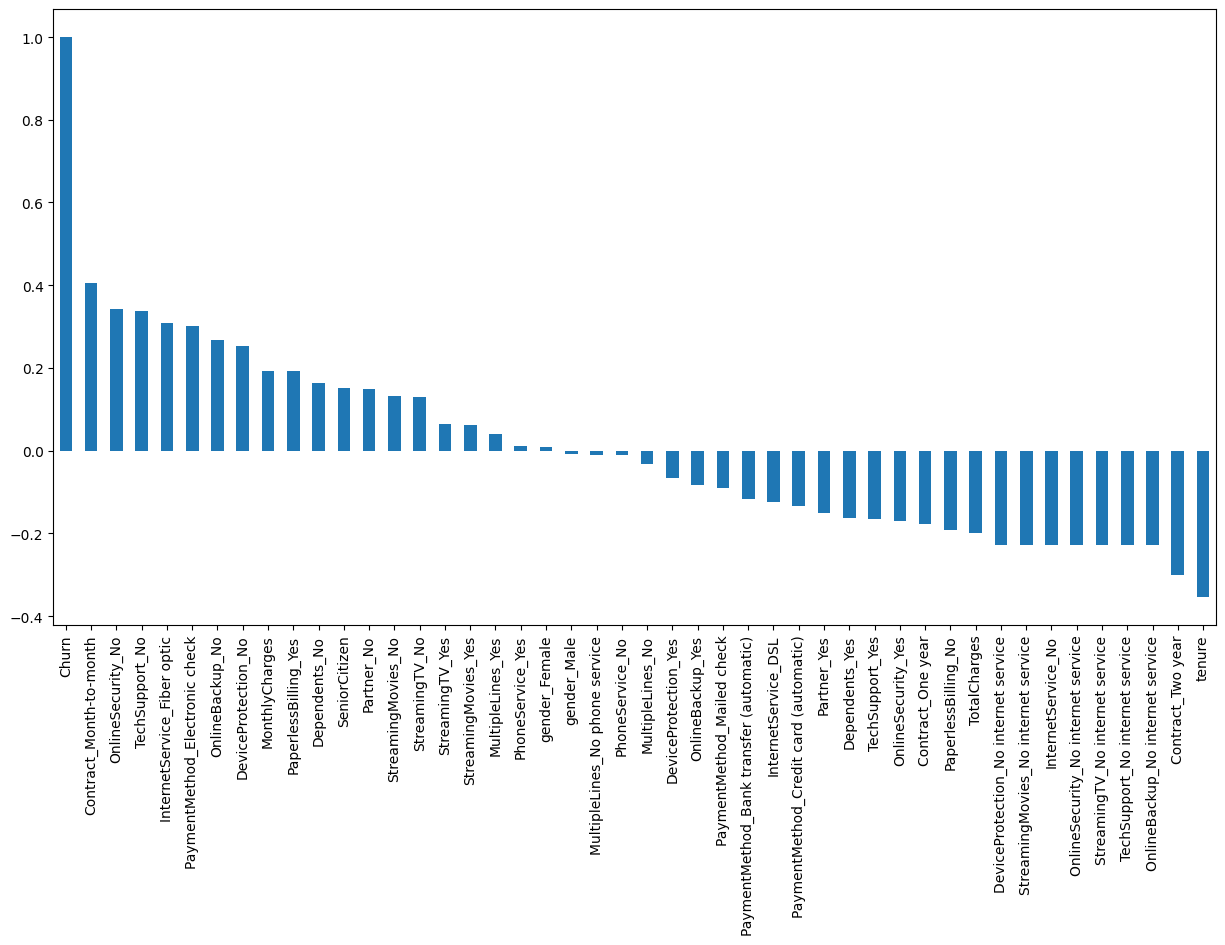

In [1039]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
New_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The features that highly correlate with Churn, either positively or negatively are: Contract_Month-to-month, InternetService_No, TechSupport_No, InternetService_Fiber optic, PaymentMethod_Electronic check, OnlineBackup_No, DeviceProtection_No, tenure, Contract_Two year, OnlineBackup_No internet service, TechSupport_No internet service, StreamingTV_No internet service, OnlineSecurity_No internet service, StreamingMovies_No internet service, DeviceProtection_No internet service.


Features that least correlate with Churn are: StreamingTV_Yes, StreamingMovies_Yes, MultipleLines_Yes, PhoneService_Yes, gender_Female, gender_Male, MultipleLines_No, PhoneService_No, MultipleLines_No phone service.

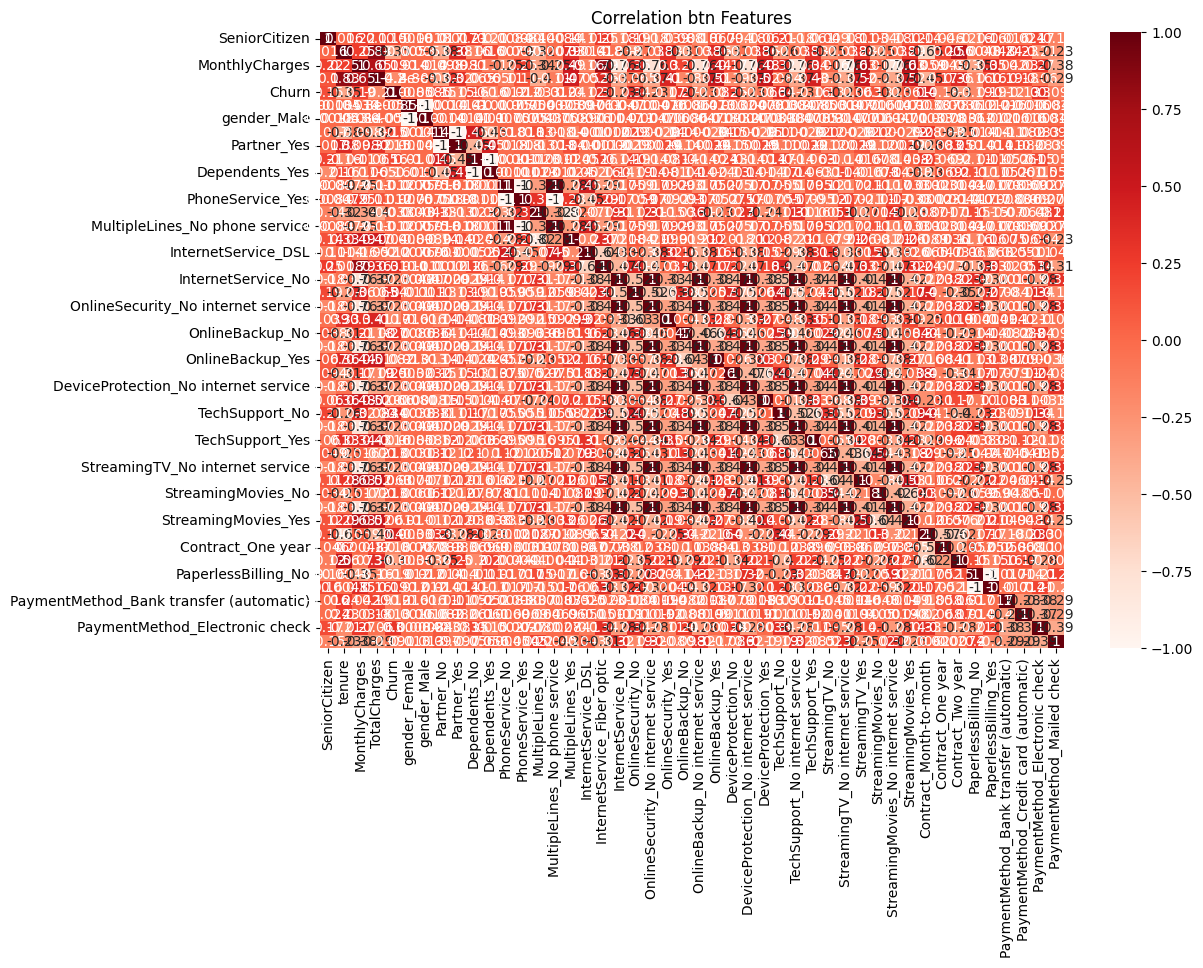

In [1040]:
#Correlation of the features
plt.figure(figsize = (12,8))
sns.heatmap(New_df.corr(), annot = True, cmap = plt.cm.Reds)
plt.title('Correlation btn Features')
plt.show()

In [1041]:
correlation_matrix = New_df.corr()

# Stack the correlation matrix to get a table
stacked_corr = correlation_matrix.stack().reset_index()
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(stacked_corr)

                      Variable 1                               Variable 2  \
0                  SeniorCitizen                            SeniorCitizen   
1                  SeniorCitizen                                   tenure   
2                  SeniorCitizen                           MonthlyCharges   
3                  SeniorCitizen                             TotalCharges   
4                  SeniorCitizen                                    Churn   
...                          ...                                      ...   
2111  PaymentMethod_Mailed check                     PaperlessBilling_Yes   
2112  PaymentMethod_Mailed check  PaymentMethod_Bank transfer (automatic)   
2113  PaymentMethod_Mailed check    PaymentMethod_Credit card (automatic)   
2114  PaymentMethod_Mailed check           PaymentMethod_Electronic check   
2115  PaymentMethod_Mailed check               PaymentMethod_Mailed check   

      Correlation  
0        1.000000  
1        0.015683  
2        0.2198

In [1042]:
#to find the correlation of our features
corr_matrix = New_df.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


In [1043]:
#determining the features that most correlate with our target variable
target =abs(corr_matrix['Churn'])
sig_features = target[target > 0.2]
sig_features

tenure                                  0.354049
Churn                                   1.000000
InternetService_Fiber optic             0.307463
InternetService_No                      0.227578
OnlineSecurity_No                       0.342235
OnlineSecurity_No internet service      0.227578
OnlineBackup_No                         0.267595
OnlineBackup_No internet service        0.227578
DeviceProtection_No                     0.252056
DeviceProtection_No internet service    0.227578
TechSupport_No                          0.336877
TechSupport_No internet service         0.227578
StreamingTV_No internet service         0.227578
StreamingMovies_No internet service     0.227578
Contract_Month-to-month                 0.404565
Contract_Two year                       0.301552
PaymentMethod_Electronic check          0.301455
Name: Churn, dtype: float64

In [1044]:
new_data = New_df[['tenure', 'InternetService_Fiber optic', 'InternetService_No',
                  'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No',
                  'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service',
                  'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                  'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year',
                  'PaymentMethod_Electronic check', 'Churn']]


In [1045]:
new_data['InternetService_Fiber_optic'] = new_data['InternetService_Fiber optic']
new_data['OnlineSecurity_No_internet_service'] = new_data['OnlineSecurity_No internet service']
new_data['OnlineBackup_No_internet_service'] = new_data['OnlineBackup_No internet service']
new_data['DeviceProtection_No_internet_service'] = new_data['DeviceProtection_No internet service']
new_data['TechSupport_No_internet_service'] = new_data['TechSupport_No internet service']
new_data['StreamingTV_No_internet_service'] = new_data['StreamingTV_No internet service']
new_data['StreamingMovies_No_internet_service'] = new_data['StreamingMovies_No internet service']
new_data['Contract_Month_to_month'] = new_data['Contract_Month-to-month']
new_data['Contract_Two_year'] = new_data['Contract_Two year']
new_data['PaymentMethod_Electronic_check'] = new_data['PaymentMethod_Electronic check']

<ipython-input-1045-dad2d78d7390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['InternetService_Fiber_optic'] = new_data['InternetService_Fiber optic']
<ipython-input-1045-dad2d78d7390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['OnlineSecurity_No_internet_service'] = new_data['OnlineSecurity_No internet service']
<ipython-input-1045-dad2d78d7390>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [1046]:
new_data.columns

Index(['tenure', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'Churn',
       'InternetService_Fiber_optic', 'OnlineSecurity_No_internet_service',
       'OnlineBackup_No_internet_service',
       'DeviceProtection_No_internet_service',
       'TechSupport_No_internet_service', 'StreamingTV_No_internet_service',
       'StreamingMovies_No_internet_service', 'Contract_Month_to_month',
       'Contract_Two_year', 'PaymentMethod_Electronic_check'],
      dtype='object')

In [1047]:
new_data = new_data.drop(columns = ['InternetService_Fiber optic', 'OnlineSecurity_No internet service',
                                    'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
                                    'TechSupport_No internet service', 'StreamingTV_No internet service',
                                    'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_Two year',
                                    'PaymentMethod_Electronic check'], axis = 1)

In [1048]:
new_data.columns

Index(['tenure', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'Churn',
       'InternetService_Fiber_optic', 'OnlineSecurity_No_internet_service',
       'OnlineBackup_No_internet_service',
       'DeviceProtection_No_internet_service',
       'TechSupport_No_internet_service', 'StreamingTV_No_internet_service',
       'StreamingMovies_No_internet_service', 'Contract_Month_to_month',
       'Contract_Two_year', 'PaymentMethod_Electronic_check'],
      dtype='object')

In [1049]:
#Defining target and feature columns
x = new_data.drop(columns = ['Churn'])
y = new_data['Churn']

In [1050]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [1051]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [1052]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.25, random_state = 42)

In [1053]:
X_train.shape

(5274, 16)

In [1054]:
from imblearn.over_sampling import SMOTE

In [1055]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=9, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [1056]:
from collections import Counter

In [1057]:
# Class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution before SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 3872, 1: 1402})
Class distribution before SMOTE: Counter({1: 3872, 0: 3872})


In [1058]:
x_train_resampled.shape

(7744, 16)

In [1059]:
pip install catboost

In [1060]:
#Machine Learning Libraries for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [1061]:
#Importing evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [1062]:
multinomial_nb = MultinomialNB()
logistic_rgr = LogisticRegression()
random_fr = RandomForestClassifier()
svm_model = SVC()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
lgbm = LGBMClassifier()
grb = GradientBoostingClassifier()


In [1063]:
# List of different classification models
models = {
    'Multinomial Naive Bayes': multinomial_nb,
    'Logistic Regression': logistic_rgr,
    'Random Forest': random_fr,
    'svm':svm_model,
    'KNeighbors' : knn,
    'XGB Classifier' : xgb,
    'cat Boost' : cat,
    'LGBM' : lgbm,
    'gradient boost' : grb
}

# Function to initialize models, fit them to the training data, and make predictions on the test data
def classification_models():
    # Creating an empty dictionary to store model-score pairs
    model_scores = {}
    for model_name, model in models.items():

        model.fit(x_train_resampled, y_train_resampled)
        predictions = model.predict(X_test)

        # Calculating accuracy score for each model
        score = accuracy_score(predictions, y_test)
        model_scores[model_name] = score

    return model_scores

In [1064]:
# Call the function and store the returned model-score pairs
model_accuracy_scores = classification_models()

for model, score in model_accuracy_scores.items():
    print(f"Model: {model}, Accuracy Score: {score}")

Learning rate set to 0.02469
0:	learn: 0.6808375	total: 4.2ms	remaining: 4.19s
1:	learn: 0.6691991	total: 7.68ms	remaining: 3.83s
2:	learn: 0.6582914	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6485553	total: 15.6ms	remaining: 3.89s
4:	learn: 0.6383379	total: 20.2ms	remaining: 4.01s
5:	learn: 0.6288774	total: 24ms	remaining: 3.98s
6:	learn: 0.6199229	total: 27.8ms	remaining: 3.95s
7:	learn: 0.6117254	total: 31.7ms	remaining: 3.93s
8:	learn: 0.6040016	total: 35.5ms	remaining: 3.91s
9:	learn: 0.5962830	total: 39.4ms	remaining: 3.9s
10:	learn: 0.5899743	total: 43.3ms	remaining: 3.89s
11:	learn: 0.5829340	total: 47.2ms	remaining: 3.88s
12:	learn: 0.5769320	total: 51.1ms	remaining: 3.88s
13:	learn: 0.5718094	total: 55ms	remaining: 3.87s
14:	learn: 0.5663126	total: 58.8ms	remaining: 3.86s
15:	learn: 0.5612123	total: 64.3ms	remaining: 3.95s
16:	learn: 0.5561999	total: 68.2ms	remaining: 3.94s
17:	learn: 0.5516675	total: 71.8ms	remaining: 3.92s
18:	learn: 0.5475712	total: 75.8ms	remaining: 3.92s

In [1065]:
# Iterate through models and generate confusion matrix and classification report
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

Confusion Matrix for Multinomial Naive Bayes:
[[623 668]
 [ 43 424]]
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.48      0.64      1291
           1       0.39      0.91      0.54       467

    accuracy                           0.60      1758
   macro avg       0.66      0.70      0.59      1758
weighted avg       0.79      0.60      0.61      1758

Confusion Matrix for Logistic Regression:
[[922 369]
 [ 92 375]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758

Confusion Matrix for Random Forest:
[[1004  287]
 [ 176  291]]
Classification Report for Random Forest:
          

In [1066]:
"""
# Define the grid of parameters
param_grid = {
    'max_depth': [5, 10, 15, 30],
    'n_estimators': [50, 100, 200, 300]
}

# Create a list of estimators
estimators = [cat, lgbm, grb]

# Iterate over each estimator
for estimator in estimators:
    # Instantiate GridSearchCV with the same param_grid for each estimator
    gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5)

    # Fit the model
    gscv.fit(x_train_resampled, y_train_resampled)

    # Print the best estimator, score, and parameters
    print("Best estimator:", gscv.best_estimator_)
    print("Best score:", gscv.best_score_)
    print("Best parameters:", gscv.best_params_)
    """


'\n# Define the grid of parameters\nparam_grid = {\n    \'max_depth\': [5, 10, 15, 30],\n    \'n_estimators\': [50, 100, 200, 300]\n}\n\n# Create a list of estimators\nestimators = [cat, lgbm, grb]\n\n# Iterate over each estimator\nfor estimator in estimators:\n    # Instantiate GridSearchCV with the same param_grid for each estimator\n    gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=\'accuracy\', cv=5)\n\n    # Fit the model\n    gscv.fit(x_train_resampled, y_train_resampled)\n\n    # Print the best estimator, score, and parameters\n    print("Best estimator:", gscv.best_estimator_)\n    print("Best score:", gscv.best_score_)\n    print("Best parameters:", gscv.best_params_)\n    '

In [1067]:

# Define the parameter grids for logistic regression

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create a list of tuples, each containing the estimator and its parameter grid

estimators = [(logistic_rgr, param_grid_lr)]

# Iterate over each estimator and its parameter grid
for estimator, param_grid in estimators:
    # Instantiate GridSearchCV
    gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=5)

    # Fit the model
    gscv.fit(x_train_resampled, y_train_resampled)

    # Print the best estimator, score, and parameters
    print("Best estimator:", gscv.best_estimator_)
    print("Best score:", gscv.best_score_)
    print("Best parameters:", gscv.best_params_)


Best estimator: LogisticRegression(C=1)
Best score: 0.7625247096151055
Best parameters: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [1068]:
cat2 = CatBoostClassifier(max_depth= 5, n_estimators=500)
lgbm2 = LGBMClassifier(max_depth=7, n_estimators=500, num_leaves=200)
gbr2 = GradientBoostingClassifier(max_depth= 5, n_estimators=300)
logistic_rgr2 = LogisticRegression(C=10,penalty="l2")

In [1069]:
models2 = {
    'Logistic Regression': logistic_rgr2,
    'cat Boost' : cat2,
    'LGBM' : lgbm2 ,
    'gradient boost' : gbr2
}

# Function to initialize models, fit them to the training data, and make predictions on the test data
def classification_models_2():
    # Creating an empty dictionary to store model-score pairs
    model_scores = {}
    for model_name, model in models2.items():

        model.fit(x_train_resampled, y_train_resampled)
        predictions = model.predict(X_test)

        # Calculating accuracy score for each model
        score = accuracy_score(predictions, y_test)
        model_scores[model_name] = score

    return model_scores


In [1070]:
# Call the function and store the returned model-score pairs
model_accuracy_scores2 = classification_models_2()

for model, score in model_accuracy_scores2.items():
    print(f"Model: {model}, Accuracy Score: {score}")

Learning rate set to 0.046619
0:	learn: 0.6714097	total: 3.55ms	remaining: 1.77s
1:	learn: 0.6516843	total: 7.05ms	remaining: 1.75s
2:	learn: 0.6339434	total: 11.4ms	remaining: 1.89s
3:	learn: 0.6188116	total: 24.1ms	remaining: 2.98s
4:	learn: 0.6045075	total: 33.2ms	remaining: 3.29s
5:	learn: 0.5911965	total: 40.1ms	remaining: 3.3s
6:	learn: 0.5810077	total: 43.8ms	remaining: 3.08s
7:	learn: 0.5711066	total: 47.1ms	remaining: 2.9s
8:	learn: 0.5624102	total: 50.4ms	remaining: 2.75s
9:	learn: 0.5541091	total: 53.9ms	remaining: 2.64s
10:	learn: 0.5475760	total: 57.4ms	remaining: 2.55s
11:	learn: 0.5412387	total: 60.9ms	remaining: 2.48s
12:	learn: 0.5338411	total: 66.3ms	remaining: 2.48s
13:	learn: 0.5286168	total: 69.7ms	remaining: 2.42s
14:	learn: 0.5234283	total: 73.2ms	remaining: 2.37s
15:	learn: 0.5188966	total: 76.7ms	remaining: 2.32s
16:	learn: 0.5133861	total: 80.2ms	remaining: 2.28s
17:	learn: 0.5097378	total: 83.5ms	remaining: 2.24s
18:	learn: 0.5053434	total: 86.9ms	remaining: 

In [1071]:
# Iterate through models and generate confusion matrix and classification report
for model_name, model in models2.items():
    y_pred = model.predict(X_test)

    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

Confusion Matrix for Logistic Regression:
[[922 369]
 [ 92 375]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758

Confusion Matrix for cat Boost:
[[1014  277]
 [ 124  343]]
Classification Report for cat Boost:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1291
           1       0.55      0.73      0.63       467

    accuracy                           0.77      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.77      0.78      1758

Confusion Matrix for LGBM:
[[1039  252]
 [ 183  284]]
Classification Report for LGBM:
              precision    recall  f1-score   suppor

In [1072]:
one_instance = [[0, 0, 0, 0, 1, 1, 1, 0, 1, 1 ,0 ,1, 1, 0 ,1 ,1]]

In [1073]:
cat2.predict(one_instance)

array([0])

In [1074]:
new_data.head()

,tenure,InternetService_No,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,Churn,InternetService_Fiber_optic,OnlineSecurity_No_internet_service,OnlineBackup_No_internet_service,DeviceProtection_No_internet_service,TechSupport_No_internet_service,StreamingTV_No_internet_service,StreamingMovies_No_internet_service,Contract_Month_to_month,Contract_Two_year,PaymentMethod_Electronic_check
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1
1,34,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0
3,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1


In [ ]:
pip install streamlit

In [1076]:
import streamlit as st
import pickle

In [1077]:
pickle_out = open("churn_classifier.pkl", "wb")
pickle.dump(cat2, pickle_out)
pickle_out.close()

# Recommendations

1. Given the many features of the dataset both present at the and the ones generated, it was wise to use only the important features. These were the features that were highly correlated the target variable.

2. During modelling, 9 classification models were tried and tested. Of the 8, catboost was found to perform better than the rest.

3. Since it was a classification problem, classification report  and confusion matrix were used to evaluate the used models.

4. To achieve better performance, the hyperparameters of the models were tuned to achieve better performance. However, there was not much difference between the initial parameters and the tuned parameters.

5. CatBoost model was saved after which it was deployed to streamlit web app.

6. The model was able to predict whether a new customer getting into the telecom company would churn or not.

